In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('heart.csv') # נטען את מאגר הנתונים שלנו

##### ראשית, נסתכל קצת על הנתונים על מנת להבין אותם טוב יותר:

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
1,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
2,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
3,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
4,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# --------------------------------------------------------------------------------------------------------------

## שאלה 1
#### א)
בחרנו במאגר הנתונים על מחלות לב.
#### ב)
במאגר נתונים זה ניתן לראות נתונים של מטופלים בבתי חולים שונים ממספר מדינות אשר נבדקו בשנת 1988. 
בכל שורה ניתן לראות נתונים הן על האדם והן נתונים רפואיים שנבדקו בבדיקה שבוצעה בבית החולים.
בנוסף, במאגר הנתונים ישנה עמודה המעידה על האם אותה בדיקה שייכת לחולה לב או לא. 
#### ג)
הפרמטרים המוצגים במאגר הנתונים, הם:

age - משתנה נומרי

sex - משתנה בוליאני

cp (chest pain type) - משתנה קטגוריאלי

trestbps - משתנה נומרי

chol - משתנה נומרי

fbs - משתנה בוליאני

restecg - משתנה קטגוריאלי

thalach	- משתנה נומרי

exang - משתנה בוליאני

oldpeak - משתנה נומרי

slope - משתנה קטגוריאלי

ca - משתנה נומרי

thal - משתנה קטגוריאלי

target - משתנה בוליאני
#### ד)
מספר הרשומות במאגר הנתונים הוא 1025.
(הערה: בהמשך הורדנו כפילויות ונשארנו עם 302 רשומות)

# --------------------------------------------------------------------------------------------------------------

#### כעת ננקה את הנתונים על מנת שנוכל לחקור אותם בצורה טובה

בתור התחלה, נוריד את כל הכפילויות (נסביר על כך בקובץ הנפרד):

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(302, 14)

## שאלה 2

#### א)

##### התפלגות המשתנה הנומרי "גיל":

Text(0.5, 0.98, 'age distribution')

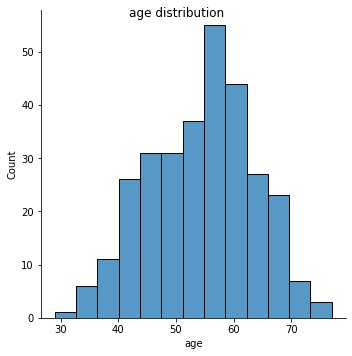

In [8]:
age_plot = sns.displot(data=df, x='age')
age_plot.fig.suptitle('age distribution')

ניתן לראות שגיל רוב המטופלים הוא 40-70, כנראה כי כשצעירים יותר מגיעים פחות לבית החולים, וכשמבוגרים יותר, יש פחות אנשים חיים בגילים אלו ולכן יש פחות ייצוג שלהם בבית החולים.

##### התפלגות המשתנה הבוליאני "מין":

Text(0.5, 6.79999999999999, 'Sex (0 = Female, 1 = Male)')

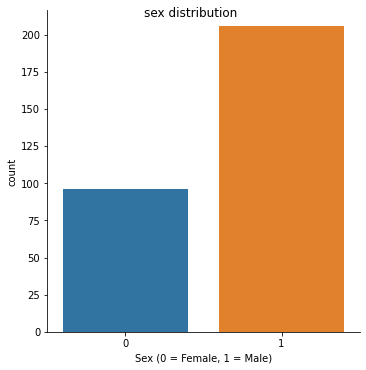

In [9]:
sex_plot = sns.catplot(data=df, kind='count', x='sex')
sex_plot.fig.suptitle('sex distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')

ניתן לראות שיש פי 2 מטופלים גברים לעומת נשים.

##### התפלגות המשתנה הקטגוריאלי "סוג כאב חזה":

Text(0.5, 0.98, 'cp distribution')

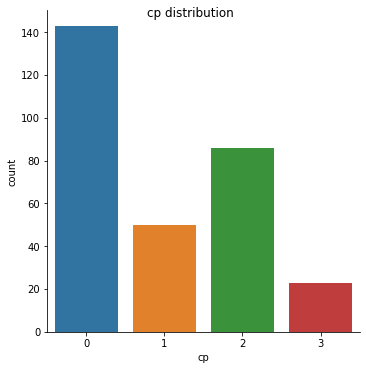

In [10]:
cp_plot =sns.catplot(x="cp", kind="count", data=df)
cp_plot.fig.suptitle('cp distribution')

ניתן לראות שכאב החזה הנפוץ ביותר הוא מסוג "0" ואחריו סוג "2".

##### התפלגות המשתנה הנומרי "דופק מקסימלי":

Text(0.5, 0.98, 'thalach distribution')

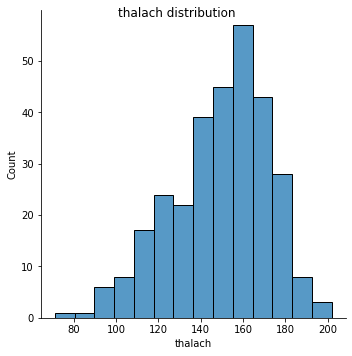

In [11]:
thalach_plot = sns.displot(data=df, x='thalach')
thalach_plot.fig.suptitle('thalach distribution')

##### התפלגות המשתנה הבוליאני "האם למטופל יש מחלות לב":

Text(0.5, 6.79999999999999, 'target (0 = no disease, 1 = disease)')

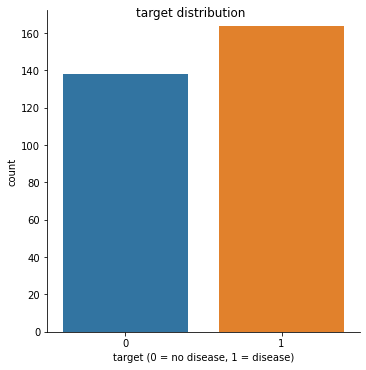

In [12]:
target_plot = sns.catplot(data=df, kind='count', x='target')
target_plot.fig.suptitle('target distribution')
plt.xlabel('target (0 = no disease, 1 = disease)')

ניתן לראות שרוב המטופלים הם חולי לב.

#### ב)

בגרף הבא ניתן לראות את כמות האנשים בעלי מחלות הלב וכמות האנשים אשר אין להם מחלות לב, לפי המין של האדם.
ניתן לראות כי אמנם ישנם יותר גברים במאגר הנתונים, אך מבחינת היחס בין אלו שיש להם מחלות לב לאלו שלא, בקרב שני המינים השונים, רוב הנשים חולות לב ורוב הגברים הם אינם חולי לב.

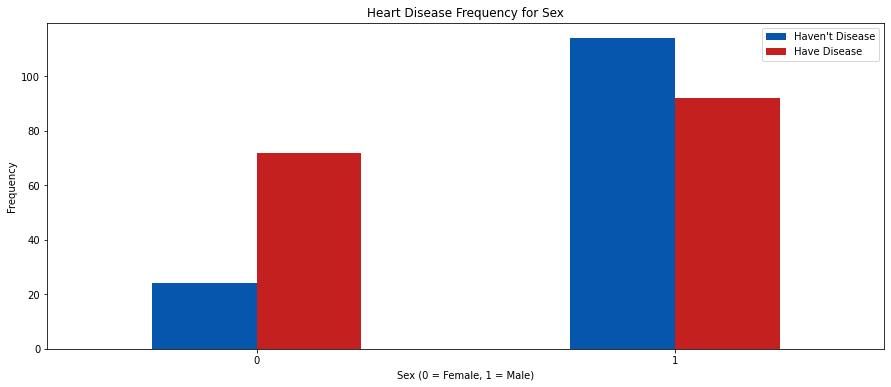

In [13]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#0656ae','#c42020'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

##### -------------------------------

בגרף הבא ניתן לראות את כמות סוגי כאב החזה אותם חוו המטופלים שבמאגר הנתונים, לפי האם קיימת מחלת לב או לא.
ניתן לראות שבקרב המטופלים שאינם חולי לב, כאב חזה מסוג "0" הוא הנפוץ ביותר. עוד ניתן לראות כי עבור סוגי הכאב "1", "2", "3", רוב המטופלים שחוו כאבים מהסוגים הללו, הם בעלי מחלות לב.

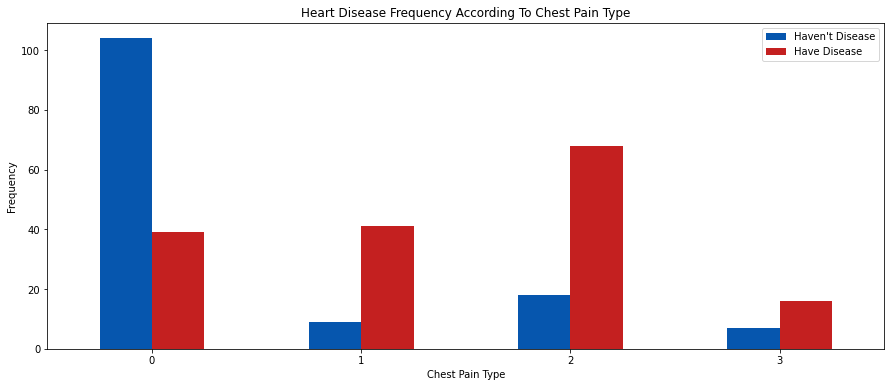

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#0656ae','#c42020'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

##### -------------------------------

בגרף הבא ניתן לראות את כמות דפיקות הלב המקסימלית של כל מטופל לפי גילו, כאשר יש הפרדה בין קבוצת המטופלים בעלי מחלות הלב לבין קבוצת המטופלים שאינם חולי לב.
ניתן לראות שבקרב המטופלים חולי הלב, ישנו ריכוז גבוה יותר בחלקו העליון של ציר ה

y.

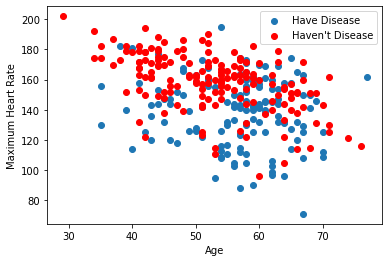

In [15]:
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.legend(["Have Disease", "Haven't Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# --------------------------------------------------------------------------------------------------------------

## שאלה 3

לצורך שאלה זו ננקה את הדאטה המקורי מרשומות שאינן שייכות לחולי לב:

In [16]:
filt = df['target'] == 1
positive_df = df[filt]
positive_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
6,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
9,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
10,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
12,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
1002,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
1015,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
1017,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


כעת, עבור מטופלים חולי לב בלבד, זו התפלגות הנשים והגברים:

Text(0.5, 6.79999999999999, 'Sex (0 = Female, 1 = Male)')

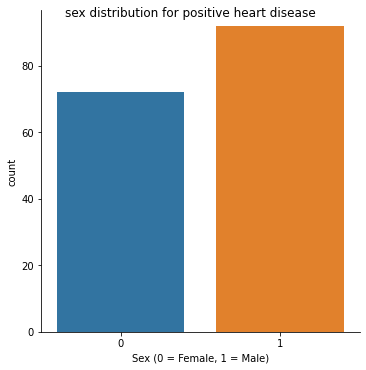

In [17]:
sex_plot = sns.catplot(data=positive_df, kind='count', x='sex')
sex_plot.fig.suptitle('sex distribution for positive heart disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')

#### א)

השאלה שנרצה לבדוק היא האם יש הבדל בגיל הממוצע של חולי הלב בין גברים לנשים. שאלה זו מעניינת אותנו מכיוון שעבור שנינו, על בסיס ידע קודם שהיה לנו, התשובה המיידית לשאלה זו הייתה שאכן יש הבדל, ורצינו לבחון האם הנתונים הללו מתיישבים עם מה שחשבנו.

#### ב)

H0: הגיל הממוצע של גברים חולי לב שווה לגיל הממוצע של נשים חולות לב.

H1: הגיל הממוצע של גברים חולי לב לא שווה לגיל הממוצע של נשים חולות לב.

#### ג)

נחלק את הדאטה פריים שלנו ל-2 דאטה פריימים שונים, אחד שמכיל את כל הגברים בעלי מחלות לב ושני שמכיל את כל הנשים בעלות מחלות לב.
נראה שממוצע הגיל עבור כל דאטה פריים הוא:

In [18]:
positive_df.groupby('sex')['age'].mean()

sex
0    54.555556
1    51.043478
Name: age, dtype: float64

כאשר מין "0" מתייחס לנשים ומין "1" מתייחס לגברים.

על סמך נתונים אלו נריץ בוטסטראפ:

In [19]:
def diff_of_avgs(df, column_name, groupby_var):
    grpby_var = df.groupby(groupby_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]  # avgs is a Series object

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note: WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [20]:
bstrap_diffs = bootstrap_mean_difference(positive_df, 'age', 'sex',  5000)

lower value:  -6.399389778794813
upper value:  -0.5687267311988151


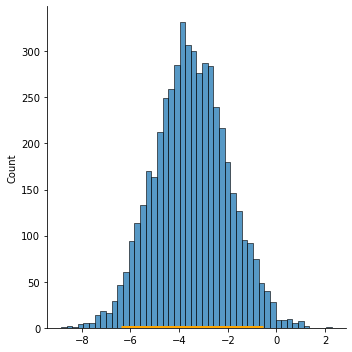

In [21]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 2.5, interpolation='higher')
right_end = np.percentile(bstrap_diffs, 97.5, interpolation='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)

# visualize results
facetgrid_obj = sns.displot(bstrap_diffs);
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5);  # lw controls thickness of line

עבדנו בשיטת בוטסטראפ, כלומר- הרצנו 5000 סימולציות אשר בכל אחת מהן יצרנו מדגם נוסף שנדגם באקראי מתוך מאגר הנתונים.
המדגם שיצרנו זהה בגודלו למאגר נתונים המקורי, ומכיוון שנדגם באקראי עם החזרה- יחס הגברים-נשים הינו בהסתברות גבוהה דומה ליחס במאגר הנתונים המקורי. בכל סימולציה חישבנו את ממוצע הגיל שבו גברים חולים במחלות לב וממוצע הגיל שבו נשים חולות במחלות לב, חישבנו את ההפרש בין הממוצעים והכנסנו להיסטוגרמה.
ניתן לראות שההפרש אפס לא נכנס ברווח הסמך של 95%, ולכן נוכל לדחות את השארת האפס האומרת שהגיל הממוצע של גברים חולי לב שווה לגיל הממוצע של נשים חולות לב (ברמת מובהקות של 95%).

# --------------------------------------------------------------------------------------------------------------

### נכין את מאגר הנתונים לשאלה 4

נפצל את המשתנים הקטגוריאלים למספר משתנים בינארים:

In [22]:
encoded_df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=False)

נעשה

scaling

עבור ערכי הדאטה פריים החדש שיצרנו קודם:

In [23]:
encoded_df_columns = encoded_df.columns
scaler = MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(encoded_df)
scaled_np_matrix[:1]

array([[1.        , 1.        , 0.29245283, 0.40639269, 0.        ,
        0.69465649, 1.        , 0.        , 0.75      , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ]])

In [24]:
scaled_df = pd.DataFrame(scaled_np_matrix, columns=encoded_df_columns)
scaled_df.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,1.000000,1.0,0.292453,0.406393,0.0,0.694656,1.0,0.000000,0.75,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.979167,0.0,0.433962,0.162100,0.0,0.343511,0.0,0.177419,0.00,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.937500,0.0,0.245283,0.326484,0.0,0.381679,1.0,0.032258,0.25,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.875000,0.0,0.169811,0.052511,0.0,0.412214,0.0,0.258065,0.00,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.875000,0.0,0.150943,0.317352,1.0,0.450382,0.0,0.000000,0.25,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.875000,0.0,0.622642,0.401826,0.0,0.694656,0.0,0.064516,0.50,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.854167,1.0,0.481132,0.109589,0.0,0.412214,1.0,0.419355,0.00,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.854167,1.0,0.622642,0.326484,0.0,0.312977,1.0,0.467742,0.25,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.854167,1.0,0.339623,0.447489,0.0,0.290076,0.0,0.387097,0.75,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.854167,1.0,0.584906,0.271689,0.0,0.549618,0.0,0.000000,0.00,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


נבנה מפת החום על מנת שנוכל לבחור את המשתנים המתאימים ביותר אשר בעזרתם נבצע את הסיווג:

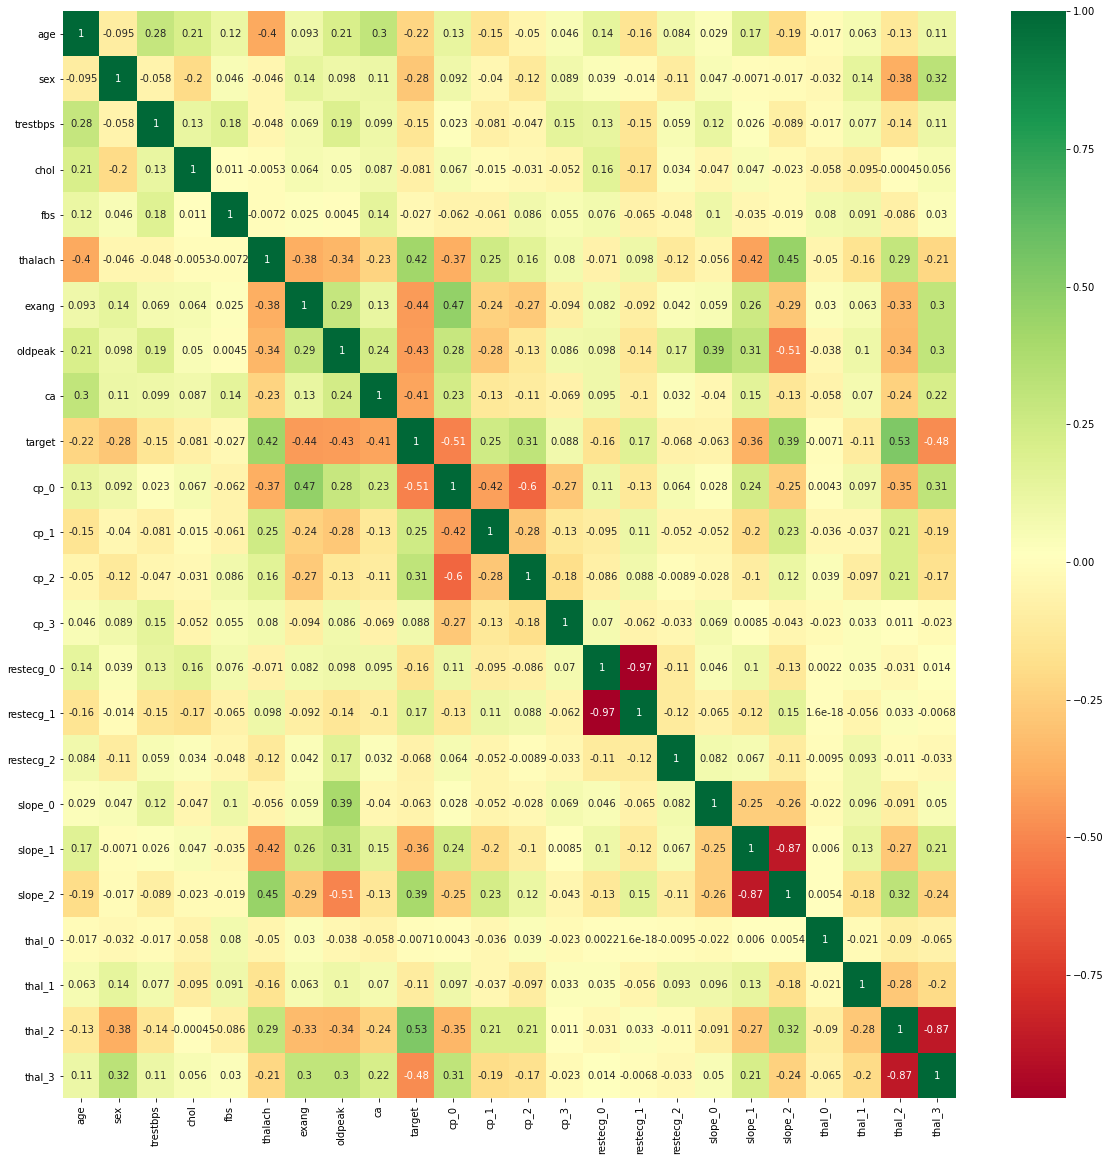

In [25]:
# compute correlation between each pair of variables in data frame
correlations = scaled_df.corr()

#plot heat map
plt.figure(figsize=(20,20))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")


## שאלה 4

בשאלה זו נבחר לעבוד על בעיית החיזוי.

#### א)

נרצה לסווג האם מטופל הוא חולה לב או לא על סמך נתונים בעלי קורלציה גבוהה עם המשתנה

target (האם יש מחלות לב או לא)

מתוך הדאטה שלנו.
נרצה לעשות זאת על מנת לדעת לנהוג בהתאם כאשר מטופל הוא חולה לב, על מנת שיקבל את הטיפול ההולם עבור מצבו הבריאותי.

מסווג זה עשוי להציל חיים כאשר לא ידוע האם למטופל יש מחלת לב, בכך שהוא נותן חיזוי ראשוני ודי מדויק על מצבו של המטופל.

#### ב)

המשתנה אותו ננסה לחזות הוא

target

ולשם החיזוי נשתמש במשתנים:

age, sex, thalach, exang, oldpeak, ca, cp_0, cp_1, cp_2, slope_1, slope_2, thal_2, thal_3

מכיוון שבטבלת החום שיצרנו ראינו שיש להם קורלציה גבוהה (בין אם ישירה או הפוכה) עם המשתנה אותו אנחנו מנסים לחזות.

#### ג)

נשתמש ב 

5-fold cross validation

על אלגוריתם

KNN

על מנת למצוא את מספר השכנים המיטבי שיעזור לנו לסווג האם המטופל חולה לב או לא.

In [26]:
X = scaled_df.drop(['target', 'trestbps', 'chol', 'fbs', 'restecg_0', 'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'slope_0', 'cp_3'],  axis='columns', inplace=False).values # features
Y = scaled_df.iloc[:, 9].values # labels

נפצל לקבוצת מבחן וקבוצת אימון:

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

נפעיל את אלגוריתם ה
KNN

בשיטת 

5-fold cross validation:

In [28]:
k_avg_score = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=5)
    k_avg_score[k] = cv_scores.mean()

נציג את התוצאות על גרף:

Text(0, 0.5, 'Average accuracy of 5-fold cross validation')

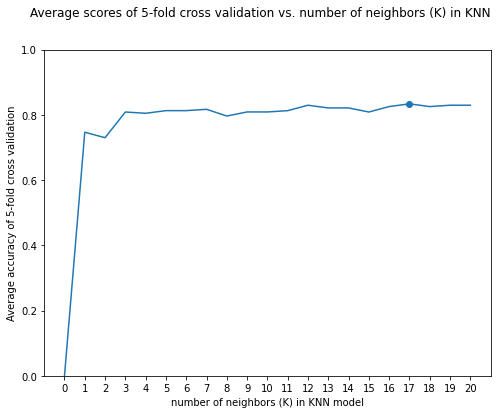

In [29]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 21))
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 5-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 5-fold cross validation')

In [30]:
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")

best average accuracy cv score is: 0.8337585034013605, for number of neighbors(K) = 17


קיבלנו על סמך ה

5-fold cross validation

שהערך

K=17

הוא הערך האופטימלי, עם דיוק של 83%.


כעת נבחן את ה

K

האופטימלי על קבוצת המבחן:

In [31]:
# fit the model on the entire train set
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(X_train, Y_train)

# test the model on the test set
test_score = knn.score(X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

Test accuracy score is: 0.819672131147541


קיבלנו שתוצאות הדיוק של המסווג עם הערך

K=17

היא 82%.